### Import library yang dibutuhkan dalam Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

### Load dataset, ubah jadi dataframe, dan lihat 5 baris pertamanya

In [2]:
df_raw = pd.read_excel('Superstore.xls')
df_raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Cek shape ukuran baris dan kolom dataframe

In [3]:
df_raw.shape

(9994, 21)

### Ikutsertakan hanya feature-feature yang dibutuhkan dalam Exploratory Data Analysis kali ini

In [4]:
df = df_raw[['Order ID', 'Order Date', 'Customer ID', 'Segment', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Profit']]
df.head()

,Order ID,Order Date,Customer ID,Segment,Category,Sub-Category,Sales,Quantity,Profit
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714
3,US-2015-108966,2015-10-11,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310
4,US-2015-108966,2015-10-11,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164


### Check adakah data kosong dalam setiap featurenya

In [5]:
df.isna().sum()

Order ID        0
Order Date      0
Customer ID     0
Segment         0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Profit          0
dtype: int64

### Check tipe data setiap featurenya

In [6]:
df.dtypes

Order ID                object
Order Date      datetime64[ns]
Customer ID             object
Segment                 object
Category                object
Sub-Category            object
Sales                  float64
Quantity                 int64
Profit                 float64
dtype: object

## 1. Uji univariat terhadap masing-masing variabel sales dan profit

In [7]:
print(df[['Sales', 'Profit']].describe())
print('Variance:')
print(df[['Sales', 'Profit']].var())

              Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000
Variance:
Sales     388434.455308
Profit     54877.798055
dtype: float64


Penjelasan:
1. Sales:
    1. __Rata-rata__ penjualan Superstore sebesar __229,9 US Dollar__.
    2. __Nilai tengah__ atau median dari penjualan Superstore adalah __54,5 US Dollar__.
    3. __Standar deviasi__ dari penjualan Superstore adalah __623,3 US Dollar__.
    4. __Varians__ dari penjualan Superstore adalah __388434,5__.
2. Profit:
    1. __Rata-rata__ profit Superstore sebesar __28,7 US Dollar__.
    2. __Nilai tengah__ atau median dari profit Superstore adalah __8,7 US Dollar__.
    3. __Standar deviasi__ dari profit Superstore adalah __234,3 US Dollar__.
    4. __Varians__ dari profit Superstore adalah __54877,8__.

## 2. Visualisasi Data

Grafik yang paling sesuai untuk memvisualisasikan histori sales selama tahun 2015 adalah __Line Chart__

#### a. Visualisasi menggunakan matplotlib

c:\users\adyan\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


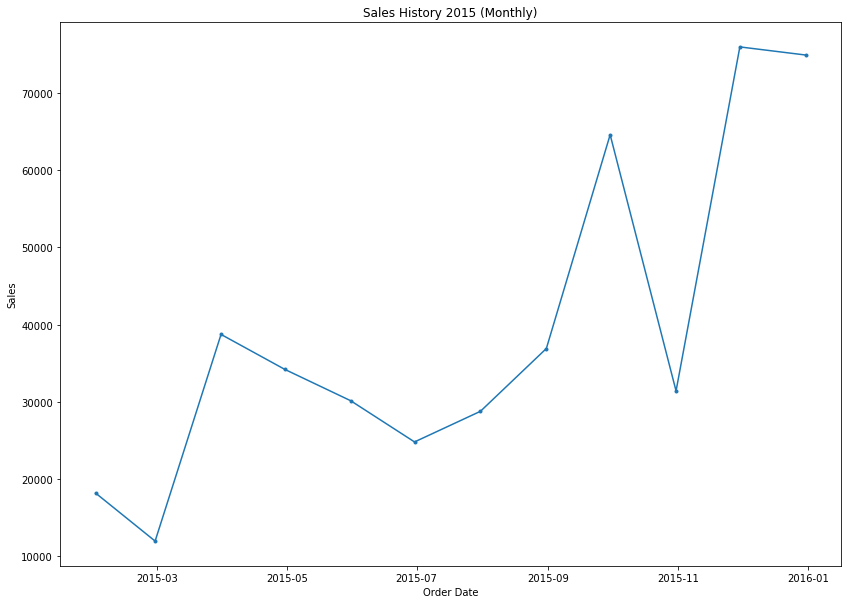

In [8]:
df_2015 = df.set_index('Order Date')['2015'].sort_index().resample('M').sum()

plt.figure(figsize=(14,10))
plt.plot(df_2015.index, df_2015['Sales'], '.-')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales History 2015 (Monthly)')
plt.show()

#### b. Visualisasi menggunakan Tableau

<img src="2015 Monthly Sales Visualization.png">

## 3. Korelasi antara variabel sales dan profit

In [9]:
df[['Sales', 'Profit']].corr()

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


Korelasi antara Sales dengan Profit sebesar 47%. Artinya variabel sales dan profit tidak memiliki hubungan atau korelasi yang signifikan karena nilainya masih di bawah 70%.

## 4. Visualisasi Korelasi

Visualisasi data yang cocok untuk menjelaskan hubungan antara variabel sales dan profit untuk tahun 2015-2016 adalah __Scatter Plot__

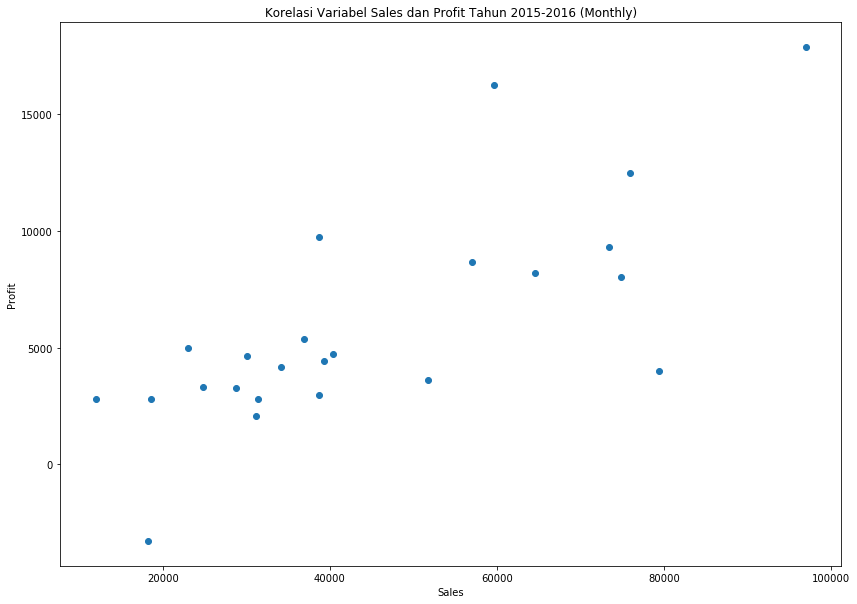

In [10]:
df_2015_2016 = df.set_index('Order Date')['2015':'2016'].sort_index().resample('M').sum()

plt.figure(figsize=(14,10))
plt.scatter(df_2015_2016['Sales'], df_2015_2016['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Korelasi Variabel Sales dan Profit Tahun 2015-2016 (Monthly)')
plt.show()

Dilihat dari visualisasi korelasi sales dan profit maka dapat disimpulkan bahwa kedua variabel tersebut tidak memiliki hubungan yang linear. Diasumiskan karena masih ada variabel harga pokok produksi yang dapat berbeda-beda tiap produknya sehingga mempengaruhi besar atau kecilnya profit yang didapat.

## 5. Prediksi Variabel Profit

Mencari gradient dan intercept

In [11]:
model = linear_model.LinearRegression()
model.fit(df[['Sales']], df['Profit'])

print(f'Gradient = {model.coef_[0]}')
print(f'Intercept = {model.intercept_}')

Gradient = 0.18006666409227626
Intercept = -12.732867116682833


In [12]:
sales_avg = df["Sales"].mean()
profit_avg = df["Profit"].mean()

print(f'Rata-rata Sales = {sales_avg}')
print(f'Rata-rata Profit = {profit_avg}')

Rata-rata Sales = 229.85800083049833
Rata-rata Profit = 28.656896307784663


#### Rekomendasi

In [13]:
target_sales = 0.2
target_profit = model.predict([[sales_avg * (1 + target_sales)]])[0]

print(f'Jika rata-rata target penjualan bertambah {int(target_sales * 100)}% menjadi $ {round(sales_avg * (1 + target_sales), 2)}, maka rata-rata keuntungan bertambah {round((target_profit - profit_avg)/profit_avg * 100, 1)}% menjadi $ {round(target_profit, 2)}')

Jika rata-rata target penjualan bertambah 20% menjadi $ 275.83, maka rata-rata keuntungan bertambah 28.9% menjadi $ 36.93


## 6. Uji Hipotesis

#### Membuat Dataframe Viewers Website

In [14]:
df_web = pd.DataFrame([{'Versi': 'Lama', 'Viewers': 10000, 'Buyers': 1530},
                      {'Versi': 'Baru', 'Viewers': 10000, 'Buyers': 1970}])
df_web = df_web.set_index('Versi')
df_web

,Viewers,Buyers
Versi,,
Lama,10000,1530
Baru,10000,1970


#### Apakah terdapat perbedaan konversi yang signifikan antara Versi A dan Versi B ?

$H_0$ = Tidak ada perbedaan konversi <br>
$H_1$ = Ada perbedaan konversi <br>
$\alpha$ = 0.5

In [15]:
chi_square = stats.chi2_contingency([[df_web['Viewers']], [df_web['Buyers']]])
print(f'p-value sebesar= {chi_square[1]}, yang artinya lebih kecil daripada alpha. Maka dapat disimpulkan bahwa Hipotesis 0 ditolak, yang berarti dengan tingkat kepercayaan 95% terdapat perbedaan konversi')

p-value sebesar= 7.697342225916094e-12, yang artinya lebih kecil daripada alpha. Maka dapat disimpulkan bahwa Hipotesis 0 ditolak, yang berarti dengan tingkat kepercayaan 95% terdapat perbedaan konversi
